<a href="https://colab.research.google.com/github/Karansingh-25/Tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression Using Neural Network using Tensorflow

**Regression** - Predicting relation Between Independent and Dependent variables


In [ ]:
import tensorflow as tf
tf.__version__

'2.18.0'

# Create Data to View and fit

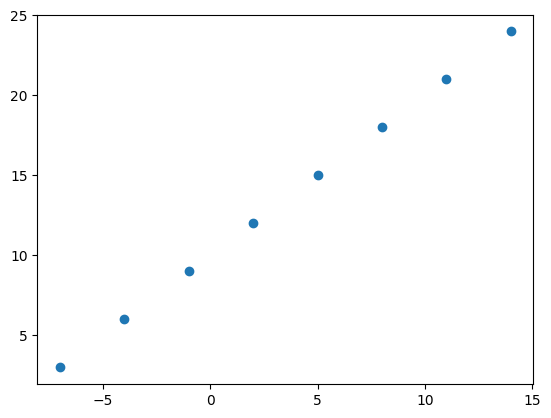

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# cretae labels
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,Y)

In [ ]:
# Relation between X and Y
Y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [ ]:
# Cretae a demo tensro for our housing price prediction problem
house_info=tf.constant(["Bedroom","Bathroom","Garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'Bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],Y[0]

(-7.0, 3.0)

In [ ]:
# Turn numoy into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
Y=tf.cast(tf.constant(Y),dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape=X[0].shape
output_shape=Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

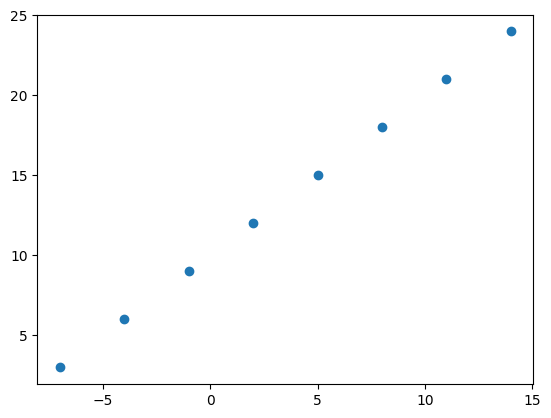

In [ ]:
plt.scatter(X,Y)

# Steps in Modelling TensorFlow

1. **Creating a Model** - defining input and output layers,as well as hidden layers of a deep learning model .

2. **Compile the Model** - define loss function (functions that tells how wrong our model is) ,and optimizer (tells how to improve the patterns its learning ) and evaluation metrices (what we can us to interpret our model) .

3. **Fitting a Model** - letting the models find the patterns between features and labels (X and Y ) .

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Creating The Model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model (if a function have a shorter name for it then string variable of shorter name can also be used to tell which function is used)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # short for Stochastic Gradient Descent
              metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 13.4994 - mae: 13.4994
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 12.9122 - mae: 12.9122
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 12.3762 - mae: 12.3762
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 11.8301 - mae: 11.8301
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 11.2147 - mae: 11.2147
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 10.5020 - mae: 10.5020
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - loss: 9.6469 - mae: 9.6469
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 8.5841 - mae: 8.5841
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 7.2318 - mae: 7.2318
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - loss: 5.3945 - mae: 5.3945
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 3.9872 - mae: 3.9872
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 4.0342 - mae: 4.0342
Epoch 13/100
1/1 ━━━━━━━━━━━

In [ ]:
# Check X and Y
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Try and Make Prediction using our Model
new_data=np.array([17.0])
y_pred=model.predict(new_data)
y_pred#,y_pred+9.5828

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[29.030052]], dtype=float32)

# Improving The Model

It can be improved by altering the steps

1. **Creating the Model** - here we might add more layers,inc. no. of neurons within each layer and can change activation function for eaxch layer

2. **Compiling Model** - here we might change the optimization function or **Learning Rate** of optimization function

3. **Fitting the model** - fit for more **epochs** or on more data

In [ ]:
#1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1),
])

#2. compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

#3. fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.5573 - mae: 13.5573
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.5268 - mae: 10.5268
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.7445 - mae: 7.7445
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.1760 - mae: 4.1760
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.2406 - mae: 6.2406
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 6.9465 - mae: 6.9465
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.5453 - mae: 5.5453
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 4.0529 - mae: 4.0529
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 3.9645 - mae: 3.9645
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.1317 - mae: 5.1317
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.2321 - mae: 5.2321
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.5977 - mae: 4.5977
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/s

In [ ]:
new_data=np.array([17])
y_pred=model.predict(new_data)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[29.68912]], dtype=float32)

****Learning rate is most important hyperparameter while making the model better****

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
    )

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=75)

Epoch 1/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.8421 - mae: 14.8421
Epoch 2/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.4306 - mae: 12.4306
Epoch 3/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.7944 - mae: 10.7944
Epoch 4/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 9.6795 - mae: 9.6795
Epoch 5/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.4607 - mae: 8.4607
Epoch 6/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.0607 - mae: 7.0607
Epoch 7/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 5.4163 - mae: 5.4163
Epoch 8/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3.9570 - mae: 3.9570
Epoch 9/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.4532 - mae: 4.4532
Epoch 10/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.2890 - mae: 5.2890
Epoch 11/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.6546 - mae: 5.6546
Epoch 12/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 5.6379 - mae: 5.6379
Epoch 13/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss

In [ ]:
y_new=np.array([17])
y_pred=model.predict(y_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[26.96244]], dtype=float32)

In [ ]:
model.save("first_model.keras")

#   Evaluating a Model

    typical workflow


    build model -> fit the model -> evaluate it -> tweak the model -> fit the model -> evaluate it -> tweak the model -> fit ythe model -> evaluate it

  ## Visualize Visualize Visualize
The data - what data are we working with

The model itself - what does our model looks like

The training if a model - how does a model perform while it learns

The predicyions of model - how to predictions of model line up against tehe ground truth

In [ ]:
#make a bigger dataset
a=tf.range(-100,100,4)
a

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
b=a+10
b

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

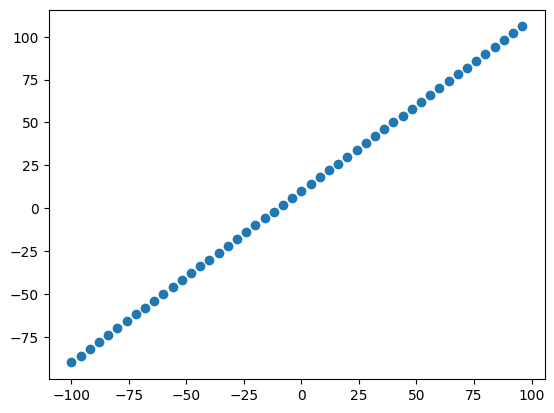

In [ ]:
#visualize data
import matplotlib.pyplot as plt
plt.scatter(a,b)

## The 3 sets.

* **Training sets** - model learns from this data, typically 70-80 percent.
* **Validation sets** - model gets tuned on this data, typically 10-25 percent.
* **Test sets** - model gets evaluated on this data to test what is learned, typically 10-25 percent of total data.

In [ ]:
# Split the data into train and test sets

a_train=a[:40]      # 80% of data
a_test=a[40:]       # 20% of data

b_train=b[:40]
b_test=b[40:]

len(a_train),len(a_test),len(b_train),len(b_test)

(40, 10, 40, 10)

### **Visualizing the data**

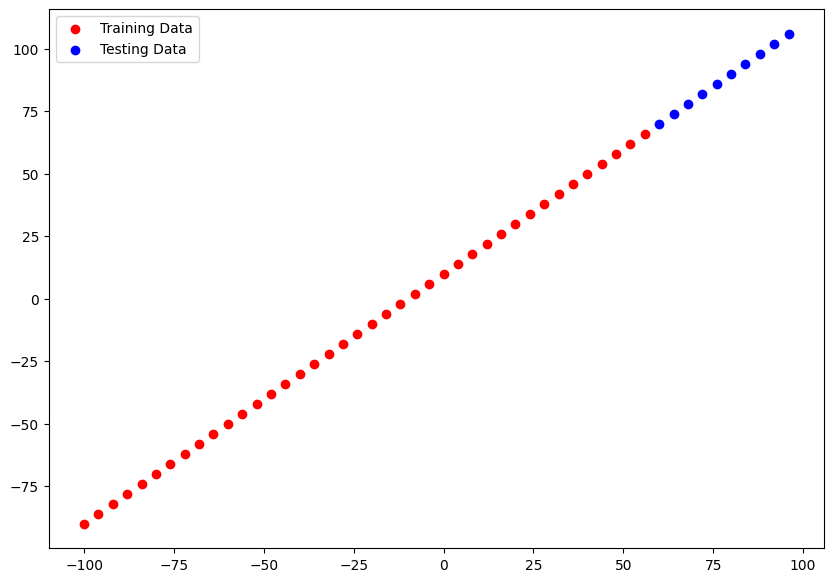

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(a_train,b_train,c="r",label="Training Data")
plt.scatter(a_test,b_test,c="b",label="Testing Data")
plt.show
plt.legend()

# Visualizing the model

In [ ]:
# 1. create a model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
new_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
new_model.fit(tf.expand_dims(a_train,axis=-1),b_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 72.5552 - mae: 72.5552
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 37.5355 - mae: 37.5355
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 8.3475 - mae: 8.3475
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.0493 - mae: 9.0493 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 8.0462 - mae: 8.0462
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.7425 - mae: 9.7425 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 8.0284 - mae: 8.0284
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 9.7309 - mae: 9.7309
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 8.0105 - mae: 8.0105
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 9.7193 - mae: 9.7193
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 7.9927 - mae: 7.9927
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.7076 - mae: 9.7076 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
new_model.summary()   # If the model is not build or fitted over some data it will show error then

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
a[0],b[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# lets create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. create a model (Same as above)
viz_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
 ],name="One_of_many_model_to_build")

# 2. compile the model (Same as above)
viz_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 🔑Name attribute should not contain spaces

In [ ]:
viz_model.summary()

Model: "One_of_many_model_to_build"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - Total no. of Parameters
* Trainable parameters - Parameters (Patterns) model can update as it trains
* Non-Trainable Parameters - Parameters aren't updated during training (typically when we use already learn parameters or patterns from other model during **Transfer Learning**)

In [ ]:
# 3. Fit model to Training Data
# Every time we run model.fit on 100 epoch it will run for next 100 times i.e if we run 2 times it will run for 200 epochs to solve this we reinstantiate the model
viz_model.fit(tf.expand_dims(a_train,axis=-1),b_train,epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 61.6312 - mae: 61.6312 
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 55.7970 - mae: 55.7970
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 49.9943 - mae: 49.9943
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 44.2160 - mae: 44.2160 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 38.3893 - mae: 38.3893
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 32.5154 - mae: 32.5154
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 26.5961 - mae: 26.5961
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 20.7058 - mae: 20.7058
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.8305 - mae: 14.8305
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.6819 - mae: 9.6819


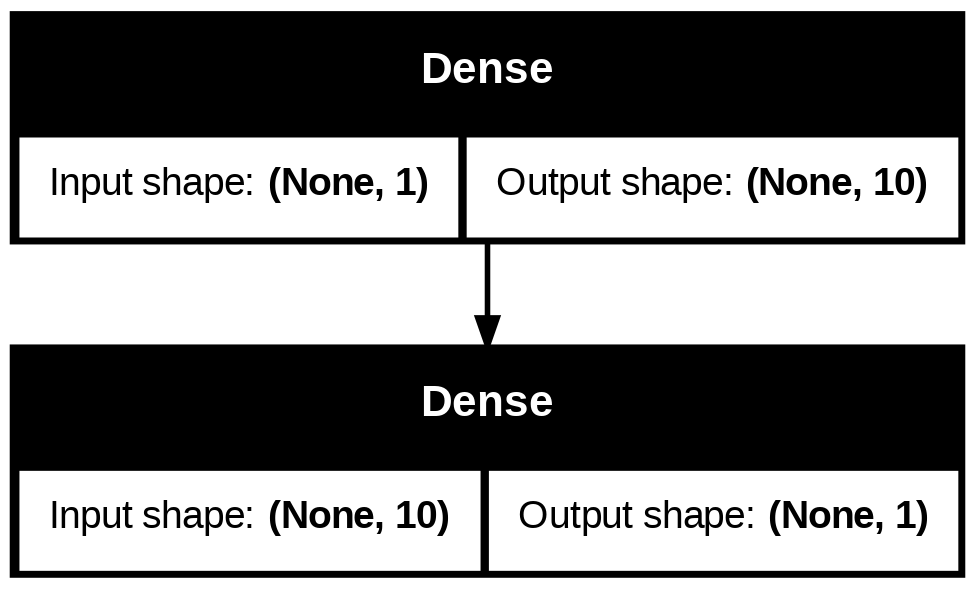

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=viz_model,show_shapes=True)

#Visualizing Model's Predictions

Often seen in the form of y_test or y_true versus y_pred

In [ ]:
# Make some predictions
b_pred=viz_model.predict(b_test)
b_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[63.910336],
       [67.588234],
       [71.26611 ],
       [74.94401 ],
       [78.62189 ],
       [82.299774],
       [85.97766 ],
       [89.65554 ],
       [93.33343 ],
       [97.011314]], dtype=float32)

In [ ]:
b_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's Create a plotting function
def plot_predictions(train_data,
                    train_labels,
                    test_data,
                    test_labels,
                     predictions):
    """
    Plots training data and test predictions to ground truth labels.
    """
    plt.close('all')
    plt.figure(figsize=(7,10))
    #Training data in blue
    plt.scatter(train_data,train_labels,c="b",label="Training Data")
    #testing data in green
    plt.scatter(test_data,test_labels,c="g",label="Test Data")
    #model's prediction in red
    plt.scatter(test_data,b_pred,c="r",label="Predictions")
    plt.legend()

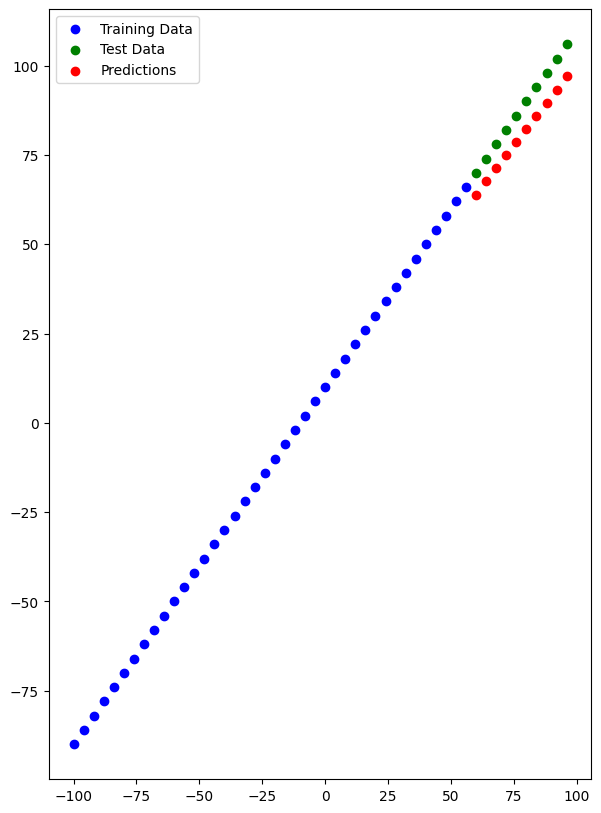

In [ ]:
plot_predictions(a_train,b_train,a_test,b_test,b_pred)

## Evaluating Models Predictions With reression evaluation metrics

Depending in the problem we are working with there are different evaluation metrices

For Regression we hve two main metrices:
* MAE - mean absolute error, "How wrong is each of my model's predictions"
* MSE - mean square error, "Square the average errors"

In [ ]:
# Evaluate model on test set
viz_model.evaluate(a_test,b_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 16.7339 - mae: 16.7339


[16.73388671875, 16.73388671875]

# Shape of Y_pred and Y_test should must be same also both should be tensor

In [ ]:
# calculate mean absolute error
tf.keras.losses.MAE(b_test,tf.constant(b_pred))
# tf.keras.losses.MeanAbsoluteError()

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([6.0896645, 6.411766 , 6.7338867, 7.055992 , 7.378113 , 7.700226 ,
       8.022339 , 8.34446  , 8.666573 , 8.988686 ], dtype=float32)>

In [ ]:
tf.constant(b_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[63.910336],
       [67.588234],
       [71.26611 ],
       [74.94401 ],
       [78.62189 ],
       [82.299774],
       [85.97766 ],
       [89.65554 ],
       [93.33343 ],
       [97.011314]], dtype=float32)>

In [ ]:
b_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(b_pred
           )

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([63.910336, 67.588234, 71.26611 , 74.94401 , 78.62189 , 82.299774,
       85.97766 , 89.65554 , 93.33343 , 97.011314], dtype=float32)>

In [ ]:
# calculate MAE with changed shape of Y_Pred
mae=tf.keras.losses.MAE(b_test,tf.squeeze(b_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.539170742034912>

In [ ]:
# Clculate MSE
mse=tf.keras.losses.MSE(b_test,tf.squeeze(b_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=57.695091247558594>

In [ ]:
# Function to calculate MAE and MSE
def mae(y_true,y_pred):
    return tf.keras.losses.MAE(y_true=y_true,
                               y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
    return tf.keras.losses.MSE(y_true=y_true,
                               y_pred=tf.squeeze(y_pred))

## Running Experiments to improve the model

1. Get more data - get more examples for model to train on .
2. Make your model larger (using a more complex model) - it can be achieved in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in data.

Let's do 3 mdelling experiments:

1. `Model_1` - Same as original model but trained for 100 epochs.

2. `Model_2` - 2 Layers, Trained for 100 epochs.

3. `Model_3` - 2 Layers, trained for 500 epochs.

**Build Model_1**

In [ ]:
X=tf.range(-100,100,4)
X.shape

TensorShape([50])

In [ ]:
Y=X+10
Y.shape

TensorShape([50])

In [ ]:
X_train=X[:40]
X_test=X[40:]

Y_train=Y[:40]
Y_test=Y[40:]

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(TensorShape([40]), TensorShape([10]), TensorShape([40]), TensorShape([10]))

# `MODEL_1`

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 81.2732 - mae: 81.2732 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 46.1663 - mae: 46.1663 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14.0439 - mae: 14.0439
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.6957 - mae: 8.6957
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 8.4544 - mae: 8.4544
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - loss: 9.2148 - mae: 9.2148
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 8.2689 - mae: 8.2689
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - loss: 8.9539 - mae: 8.9539
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 7.9780 - mae: 7.9780
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 9.6407 - mae: 9.6407
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 7.9601 - mae: 7.9601 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 9.6291 - mae: 9.6291
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


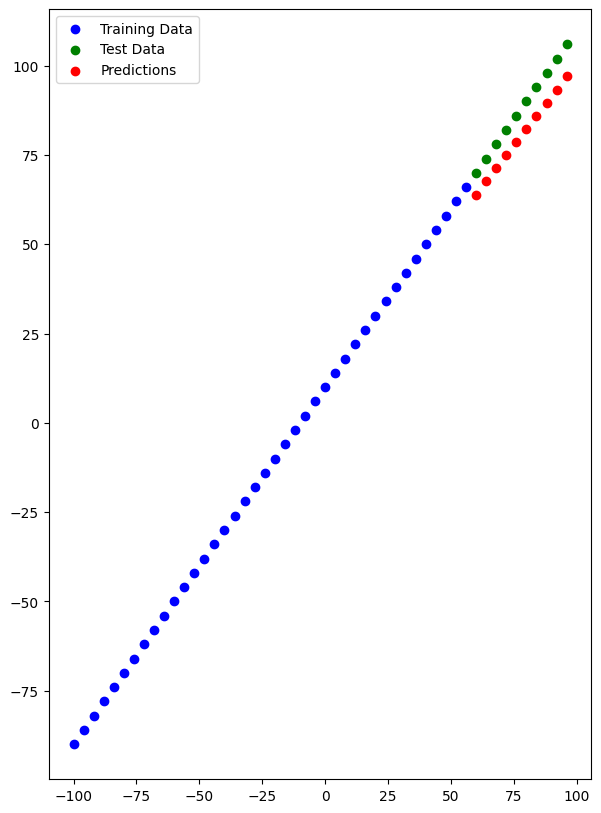

In [ ]:
# Make and plot predictions for model_1
Y_pred_1 = model_1.predict(X_test)
Y_pred_1
plot_predictions(X_train,Y_train,X_test,Y_test,Y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1=mae(Y_test,Y_pred_1)
mse_1=mse(Y_test,Y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=5.548033714294434>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.98459815979004>)

`MODEL_2`

* 2 Dense layers trained for 100 Epochs

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
        ])
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_2.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 27.3363 - mse: 1162.3574
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.6154 - mse: 799.2397
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 22.3217 - mse: 678.2162
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 22.6986 - mse: 696.7769
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.0467 - mse: 327.6520
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.6940 - mse: 342.5952
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.9846 - mse: 347.8890
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.6394 - mse: 217.5674
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.4164 - mse: 289.5636
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 15.9380 - mse: 341.6934
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.0582 - mse: 218.3312
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.0815 - mse: 310.9563
Epoch 13/100

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


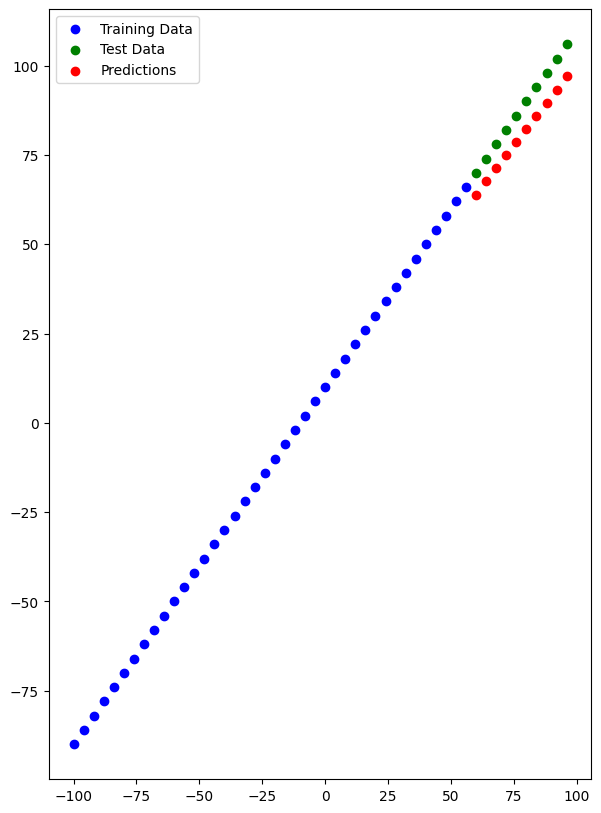

In [ ]:
# Make and plot predictions
Y_predict_2=model_2.predict(X_test)
plot_predictions(X_train,Y_train,X_test,Y_test,Y_predict_2)

In [ ]:
mae_2=mae(Y_test,Y_predict_2)
mse_2=mse(Y_test,Y_predict_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.963836669921875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1099.7728271484375>)

`MODEL_3`

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
        ])
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_3.fit(tf.expand_dims(X_train,axis=-1),Y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 51.0277 - mse: 3789.9102 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 25.4181 - mse: 884.2784
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.9956 - mse: 782.9009
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.4156 - mse: 336.7455
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.4632 - mse: 459.1580
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.2404 - mse: 236.3826
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.0281 - mse: 316.6955
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.6354 - mse: 333.0159
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.5566 - mse: 213.6298
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.3758 - mse: 287.0339 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9737 - mse: 192.0365
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7958 - mse: 302.2939
Epoch 13/5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


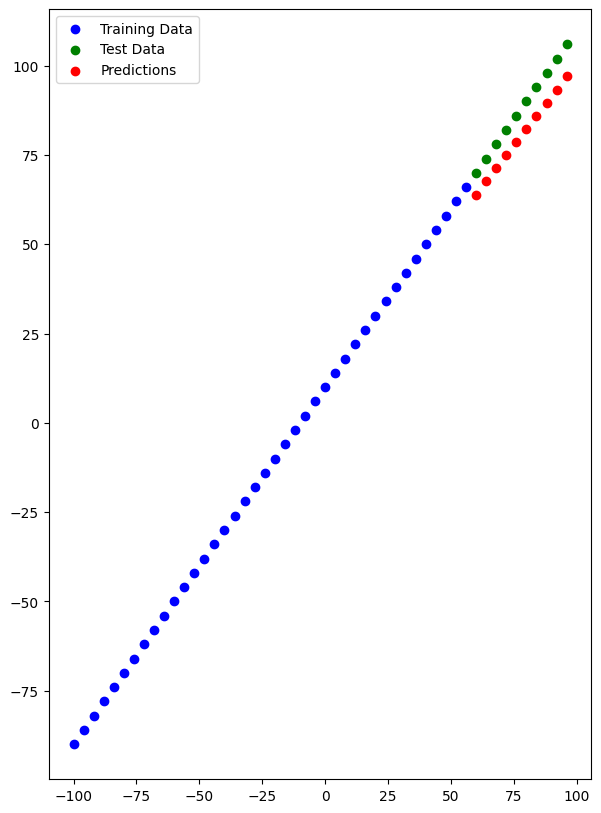

In [ ]:
Y_predict_3=model_3.predict(X_test)
plot_predictions(X_train,Y_train,X_test,Y_test,Y_predict_3)

In [ ]:
mae_3=mae(Y_test,Y_predict_3)
mse_3=mse(Y_test,Y_predict_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=32.15867233276367>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1051.8546142578125>)

# Comparing The Results of Our Experiment

In [ ]:
# Use pandas dataframe to compare the results
import pandas as pd

model_results=[[model_1,mae_1.numpy(),mse_1.numpy()],
               [model_2,mae_2.numpy(),mse_2.numpy()],
               [model_3,mae_3.numpy(),mse_3.numpy()]]

results=pd.DataFrame(model_results,columns=["Model","MAE","MSE"])
results

,Model,MAE,MSE
0,"<Sequential name=sequential_4, built=True>",5.548034,30.984598
1,"<Sequential name=sequential_5, built=True>",32.963837,1099.772827
2,"<Sequential name=sequential_6, built=True>",32.158672,1051.854614


# Tracking Your Experiments

**Tools to keep track espically when a lot of experiments are performed**

`Tensorboard` - Component of Tensorflow Library

`Wights and biases` - Tool for tracking all kinds of Machine Learning Experiments (Plugs Straight into TensorBoard)

## Saving Our Models

Saving Model allows to use Model outside the boundries where it was trained.

* Two formats for Saving The Model

    `SavedModel format`

    `HDF5 format`

In [ ]:
# save the model

model_1.save("model_1_saved_SavedModel_format.keras")

In [ ]:
model_1.save("model_1_saved_HDF5_format.h5")

# Loading the saved model

In [ ]:
# Load a SavedModel Format model

loaded_savedmodel_format_model = tf.keras.models.load_model("model_1_saved_SavedModel_format.keras")
loaded_savedmodel_format_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Load H5 model
loaded_h5_model = tf.keras.models.load_model("model_1_saved_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# A Larger Example

`Medical Insurance Regression Model`

In [ ]:
# Import Required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## `Some columns contain object datatype ,we have to perform numerical encoding (one-hot encoding) to convert them into Numerical values`

`pd.get_dummies` - Performs one hot encoding on pandas DataFrame.

* female=1
* male=0

In [ ]:
#One-hot encoding
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
#create X and Y values
insurance_X=insurance_one_hot.drop(columns="charges",axis=1)
insurance_Y=insurance_one_hot["charges"]

In [ ]:
insurance_X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
insurance_Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
#create training and test datasets
from sklearn.model_selection import train_test_split
insurance_X_train, insurance_X_test, insurance_Y_train, insurance_Y_test=train_test_split(insurance_X,insurance_Y,test_size=0.2,random_state=42)

len(insurance_X_train),len(insurance_X_test),len(insurance_Y_train),len(insurance_Y_test)

(1070, 268, 1070, 268)

In [ ]:
#build a neural network model
tf.random.set_seed(42)

# 1. Build
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit
insurance_model.fit(tf.convert_to_tensor(insurance_X_train.astype(np.float32)),insurance_Y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10327.2490 - mae: 10327.2490
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7638.4795 - mae: 7638.4795
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7491.5005 - mae: 7491.5005
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7851.9800 - mae: 7851.9800
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7380.0615 - mae: 7380.0615
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7801.8569 - mae: 7801.8569
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7192.3003 - mae: 7192.3003
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7721.3779 - mae: 7721.3779
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7141.2095 - mae: 7141.2095
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7342.3604 - mae: 7342.3604
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7809.0518 - mae: 7809.0518
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
#Check results on test data
insurance_model.evaluate(tf.convert_to_tensor(insurance_X_test.astype(np.float32)),insurance_Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5372.4092 - mae: 5372.4092  


[5206.85546875, 5206.85546875]

# Improve the model

    Added one extra layer and changed the optimizer

In [ ]:
#build a neural network model
tf.random.set_seed(42)

# 1. Build
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit
insurance_model_2.fit(tf.convert_to_tensor(insurance_X_train.astype(np.float32)),insurance_Y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 12519.4248 - mae: 12519.4248
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7517.5840 - mae: 7517.5840
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7245.6328 - mae: 7245.6328
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7037.5054 - mae: 7037.5054
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6753.2559 - mae: 6753.2559
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6416.6934 - mae: 6416.6934
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6251.9175 - mae: 6251.9175
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6127.4927 - mae: 6127.4927
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5978.1333 - mae: 5978.1333
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5776.7808 - mae: 5776.7808
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5523.2637 - mae: 5523.2637
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
insurance_model_2.evaluate(insurance_X_test,insurance_Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3238.5107 - mae: 3238.5107  


[3174.737060546875, 3174.737060546875]

In [ ]:
#build a neural network model
tf.random.set_seed(42)

# 1. Build
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# 3. Fit
history=insurance_model_3.fit(insurance_X_train,insurance_Y_train,epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12633.5879 - mae: 12633.5879
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7548.6006 - mae: 7548.6006
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7216.0234 - mae: 7216.0234
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7010.1377 - mae: 7010.1377
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6728.0781 - mae: 6728.0781
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6399.2700 - mae: 6399.2700
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6252.4585 - mae: 6252.4585
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6122.5820 - mae: 6122.5820
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5984.9780 - mae: 5984.9780
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5810.0996 - mae: 5810.0996
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5555.9014 - mae: 5555.9014
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

In [ ]:
insurance_model_3.evaluate(insurance_X_test,insurance_Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3208.2388 - mae: 3208.2388  


[3152.53466796875, 3152.53466796875]

In [ ]:
insurance_model_2.evaluate(insurance_X_test,insurance_Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3442.0029 - mae: 3442.0029  


[3389.01953125, 3389.01953125]

Text(0.5, 0, 'epochs')

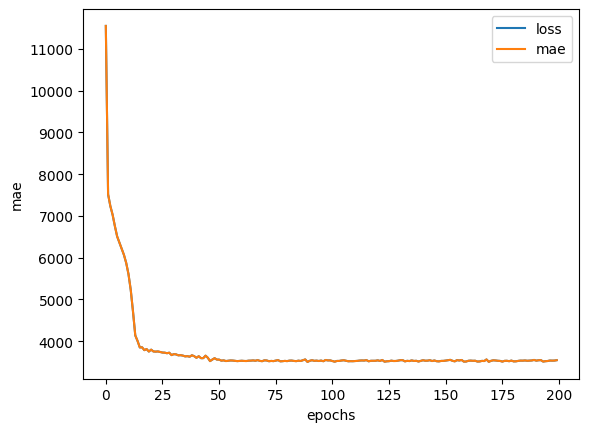

In [ ]:
# plot loss or mae curve
pd.DataFrame (history.history).plot()
plt.ylabel("mae")
plt.xlabel("epochs")

# How long should we train ?

It majorly depends upon the problem we are solving... But TensorFlow has a solution to it called [Early Stopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

`Stop training when a monitored metric has stopped improving.`

# Preprossing Data (Normalization and Standardization)

    In terms of scaling values, neural Networks prefer normalization.

    If you don't know which one to use,You could try both and see which one performs better.



In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='Frequency'>

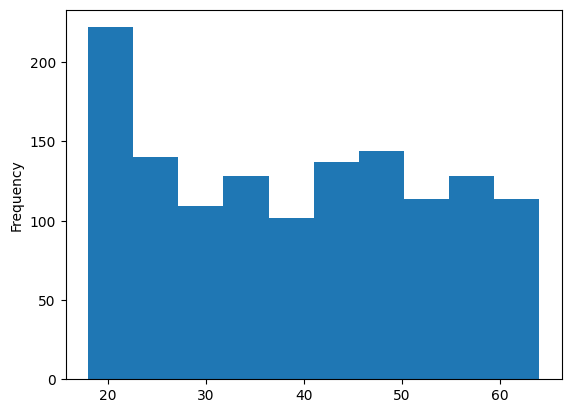

In [ ]:
insurance_X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

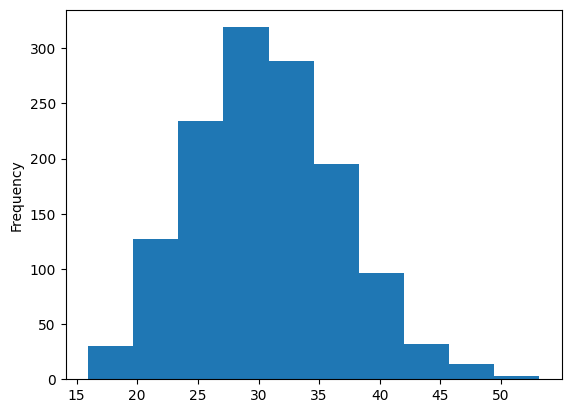

In [ ]:
insurance_X["bmi"].plot(kind="hist")

To prepare data borrow few classes from Scikit-Learn

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# create X and Y values
X=insurance.drop("charges",axis=1)
Y=insurance["charges"]

# test and train dataset split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization with MinMaxScaler and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [ ]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
# what does data look like
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Data is organised and one hot encoded , now it is ready to be passed to a neural network

In [ ]:
#Build model
tf.random.set_seed(42)

# 1.
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2.
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"])

# 3.
insurance_model_4.fit(X_train_normal,Y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 13254.2070 - mae: 13254.2070
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12091.9805 - mae: 12091.9805
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8409.8594 - mae: 8409.8594
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7602.9761 - mae: 7602.9761
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7142.1196 - mae: 7142.1196
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6545.3706 - mae: 6545.3706
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5671.3228 - mae: 5671.3228
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4489.4780 - mae: 4489.4780
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3721.6899 - mae: 3721.6899
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3637.3596 - mae: 3637.3596
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3626.2937 - mae: 3626.2937
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

In [ ]:
# Evaluate insurance model on normalized data
insurance_model_4.evaluate(X_test_normal,Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3219.9465 - mae: 3219.9465  


[3165.0947265625, 3165.0947265625]

In [ ]:
insurance_model_4.predict(X_test_normal)[10]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([35470.35], dtype=float32)